# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #3: Temporal Visualization

In this homework, you will be working with visualizations of stock data. To achieve this, we'll be using [``pandas``](https://pandas.pydata.org/docs/user_guide/10min.html) to get the specific information we want (e.g. closing price) from four datasets we've aggregated in the `datasets/` directory. We'll provide example code on how to load in the required data, but your task is to complete the code.

## Imports

**Don't modify this code**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Importing from dataset file

Below is a helper function that imports raw data from the url provided, performs some pre-processing to change the date format into DateTime, and returns the final dataframe. Feel free to use this helper function in your code implementation.

Below is an example of using the helper function to import the stock data from `./datasets/amzn.csv`:

In [2]:
def import_df(filename):
    df = pd.read_csv(filename)
    df['dates'] = pd.to_datetime(df['dates'], format='%Y-%m-%d')
    return df

example_df = import_df("./datasets/amzn.csv")

Now that you have the dates and closing prices of AMZN in a dataframe, you can plot! Remember that you can access and plot a specific column of a dataframe with the following code logic:

```
x = df['x_axis']
y = df['y_axis']
plt.plot(x, y)
```

Below is an example using Amazon's raw stock data.

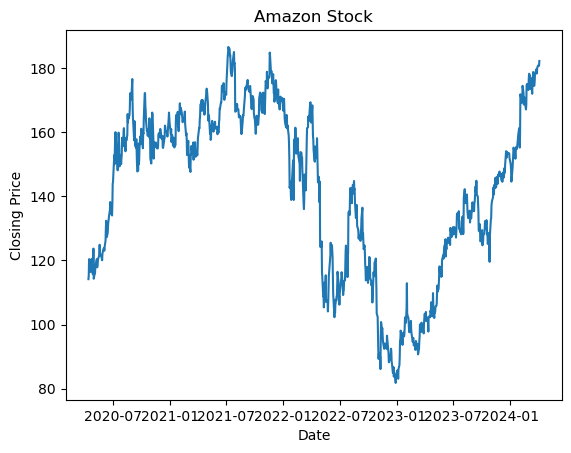

In [3]:
# Plot the dates vs. closing price for AMZN
fig = plt.figure()
plt.plot(example_df['dates'], example_df['closing price'])

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Amazon Stock")
plt.show()

## Part 1: Curve-Based Visualization (5/15 points)

Temporally visualize the closing prices for the 1000 trading days of the 4 stocks as well as the mean (average) closing price across all 4 stocks for each day. Make sure to visualize all data in a single diagram. Color-code the plot so that each stock has a different color. Add a legend to let us know which plot represents which stock/data. An example is provided below:

In [4]:
az_df = example_df
az_df.rename(columns={'closing price': 'az_closing price', 'volume': 'az_volume'}, inplace=True)

In [5]:
meta_df = import_df("./datasets/meta.csv")
meta_df.rename(columns={'closing price': 'meta_closing price', 'volume': 'meta_volume'}, inplace=True)

In [6]:
aapl_df = import_df("./datasets/aapl.csv")
aapl_df.rename(columns={'closing price': 'aapl_closing price', 'volume': 'aapl_volume'}, inplace=True)

In [7]:
goog_df = import_df("./datasets/goog.csv")
goog_df.rename(columns={'closing price': 'goog_closing price', 'volume': 'goog_volume'}, inplace=True)

In [8]:
mean_df = pd.merge(pd.merge(pd.merge(az_df, meta_df, on='dates'), aapl_df, on='dates'), goog_df, on='dates')

In [9]:
mean_df['mean_closing price'] = mean_df[['az_closing price', 'meta_closing price','aapl_closing price','goog_closing price']].mean(axis=1)

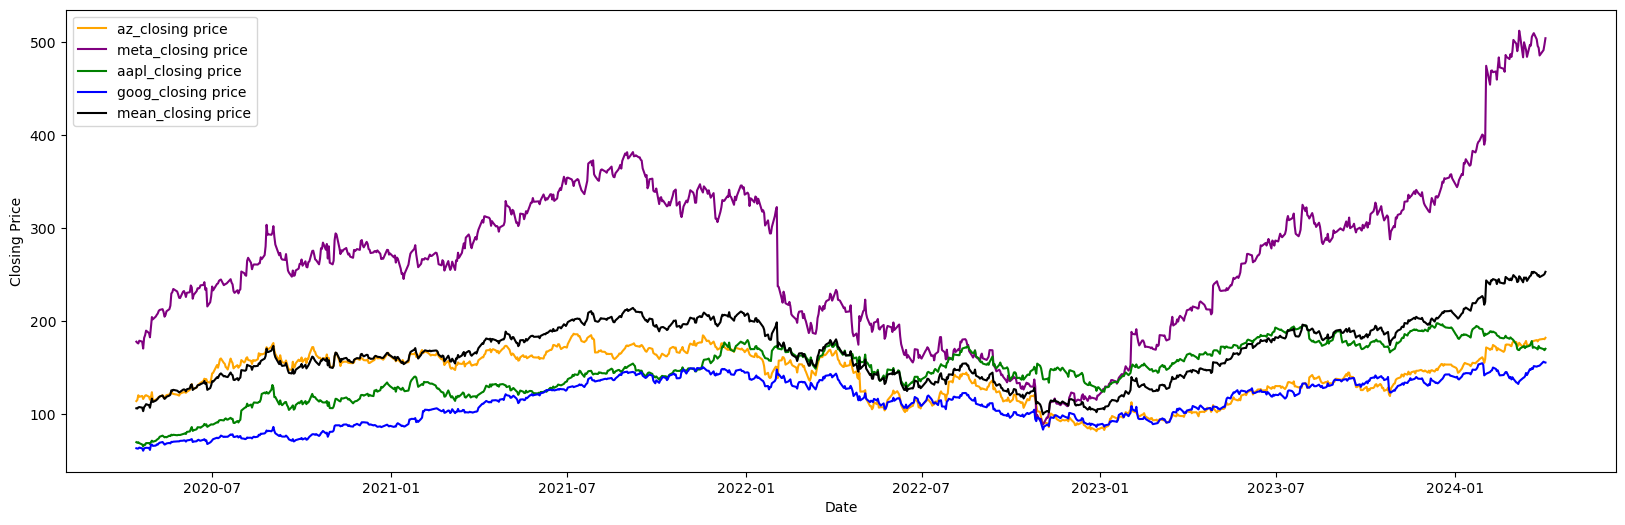

In [10]:
# Part 1: Closing price of at least 4 stocks + the mean (or average) of those four stocks for the past 1000 trading days

fig = plt.figure(figsize=(20, 6)) 
plt.plot(mean_df['dates'], mean_df['az_closing price'],label='az_closing price',color='orange')
plt.plot(mean_df['dates'], mean_df['meta_closing price'],label='meta_closing price',color='purple')
plt.plot(mean_df['dates'], mean_df['aapl_closing price'],label='aapl_closing price',color='green')
plt.plot(mean_df['dates'], mean_df['goog_closing price'],label='goog_closing price',color='blue')
plt.plot(mean_df['dates'], mean_df['mean_closing price'],label='mean_closing price',color='black')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Part 2: Stacked Area Visualization (7/15 points)

Your task here is to plot two different plots. The first plot is the _stacked area chart_ of the _volumes_ of the 4 stocks. The second plot is the same, except you need to plot the _**percentage** stacked area chart_. To achieve the latter, you will need to find the percentages of the total volume for each of your stocks on each day.

Make sure to color-code your area plots so that it's easy to distinguish the stocks, and add a legend to help us identify which data represents which stock. There is no need to visualize the mean data here.

In [11]:
# Part 2: Both normal and percentage stacked area charts of the volume of the stocks for the past 1000 trading days

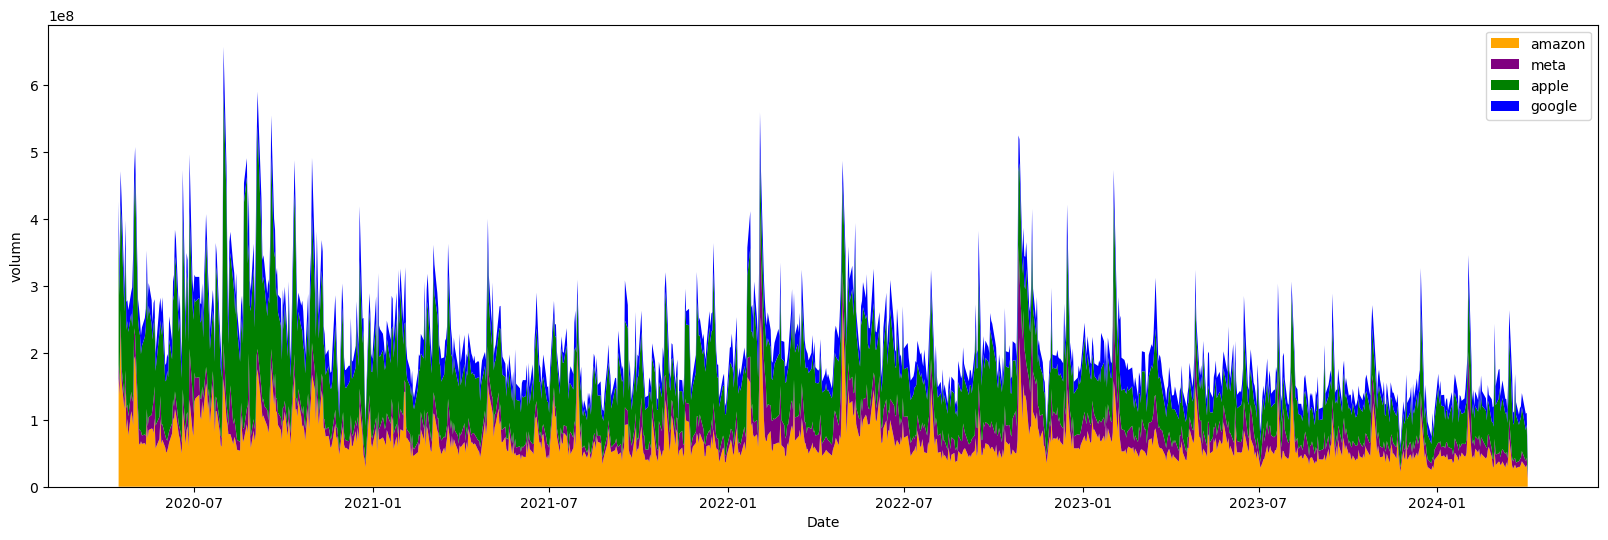

In [12]:
fig = plt.figure(figsize=(20, 6)) 
plt.stackplot(mean_df['dates'], mean_df['az_volume'], mean_df['meta_volume'], mean_df['aapl_volume'],mean_df['goog_volume'], labels=['amazon', 'meta', 'apple','google'],
              colors=['orange','purple','green','blue'])

plt.xlabel('Date')
plt.ylabel('volumn')
plt.legend()
plt.show()

In [13]:
mean_df['sum_volumn'] = mean_df[['az_volume', 'meta_volume','aapl_volume','goog_volume']].sum(axis=1)

In [14]:
columns = [col for col in mean_df if col.endswith('_volume')]
for i in mean_df[columns]:
    new_col_name = f"{i}_percentage"  
    mean_df[new_col_name] = mean_df[i] / mean_df['sum_volumn']

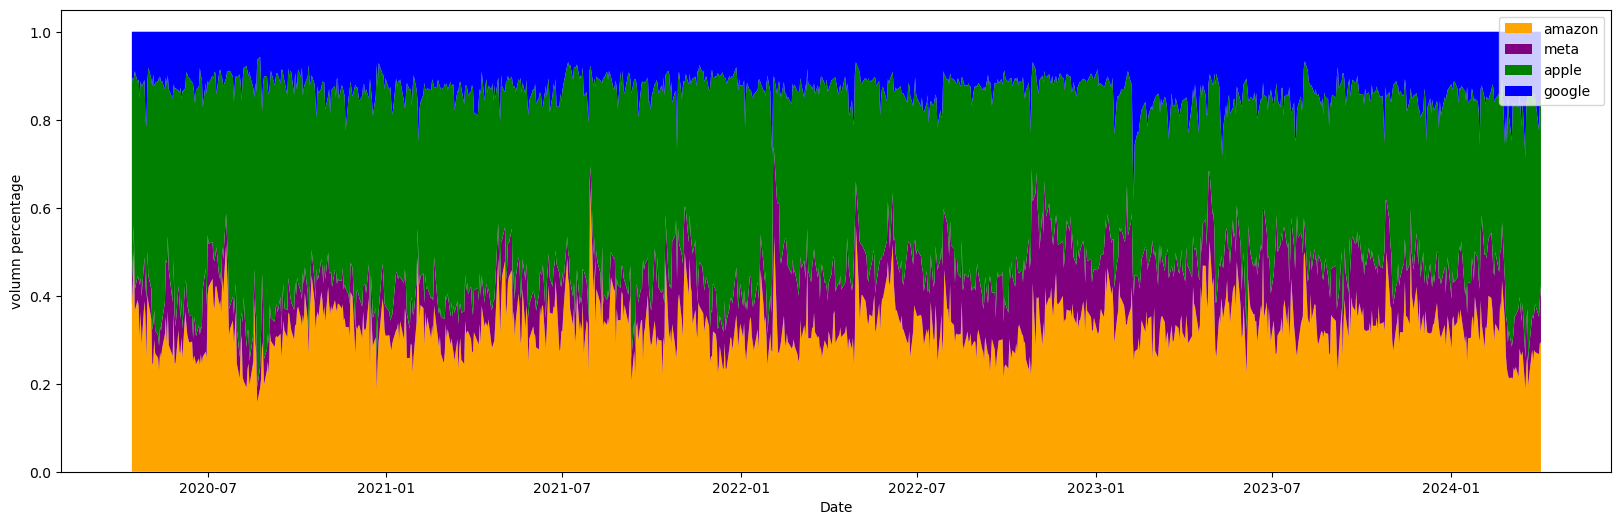

In [15]:
fig = plt.figure(figsize=(20, 6)) 
plt.stackplot(mean_df['dates'], mean_df['az_volume_percentage'], mean_df['meta_volume_percentage'], mean_df['aapl_volume_percentage'],mean_df['goog_volume_percentage'], labels=['amazon', 'meta', 'apple','google'],
              colors=['orange','purple','green','blue'])

plt.xlabel('Date')
plt.ylabel('volumn percentage')
plt.legend()
plt.show()

## Part 3: Meaning behind the Data? (2/15 points)

Within 2-5 sentences for each, answer the following:

1. Do you notice any trends in the closing prices of each company's stock? What might these patterns indicate regarding the performance of these tech companies? (1 point)

2. Who occupies the biggest volume percentage across the four companies? What does this tell you about the performance of these tech companies? (1 point)

Feel free to write down your analyses inside this notebook or as a standalone document.

### 1)
The closing prices of each company trended upward after experiencing a sharp decline from 2022 to 2023. This downturn could likely be attributed to the impact of COVID-19. However, all four companies have shown recovery and an upward trend post-2023, indicating a rebound from the pandemic's effects.

### 2)
Google: Based on the trading volumes of these companies, it appears that they have maintained their stock prices in a stable and peaceful trend. This consistency likely attracts more people to trade with the company.